##  Loading of dependencies and dataset

In [6]:
!pip install ultralytics

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os
import shutil
import random
from ultralytics import YOLO

In [9]:
# !rmdir /content/datasets

HOME = os.getcwd()
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="rfIDWoGPZDV0R2uGDIyc")
project = rf.workspace("yong-hann-choo-wdvd2").project("window-detection-9ird1")
version = project.version(1)
dataset = version.download("yolov8")



/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uni

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.11, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Window-Detection-1 in yolov8:: 100%|██████████| 1087/1087 [00:00<00:00, 7735.89it/s]


In [12]:
# Normalise training data
import os
import cv2

image_dir = "/content/datasets/Window-Detection-1/train/images"
def normalize_image_inplace(image):
    image = image.astype(float)
    image /= 255.0

for filename in os.listdir(image_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        filepath = os.path.join(image_dir, filename)
        image = cv2.imread(filepath)
        normalize_image_inplace(image)
        cv2.imwrite(filepath, image)

## Training and Finetuning YOLOv8 model

In [13]:
# CONSTANTS
IMAGE_SIZE = 640
OPTIMISER = 'SGD'
LEARNING_RATE = 0.01
BATCH_SIZE = 10
EPOCHS = 20
CLOSE_MOSAIC = 10

training_data = str(dataset.location) + "/data.yaml"



In [15]:
# utilise pretrained model
model = YOLO('yolov8s.yaml').load('yolov8s.pt')
results = model.train(data=training_data, epochs=EPOCHS, imgsz=IMAGE_SIZE, lr0=LEARNING_RATE, batch=BATCH_SIZE, optimizer=OPTIMISER, close_mosaic=CLOSE_MOSAIC, degrees=20)

Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.2.11 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Window-Detection-1/data.yaml, epochs=20, time=None, patience=100, batch=10, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, s

100%|██████████| 755k/755k [00:00<00:00, 22.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 103MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/Window-Detection-1/train/labels... 498 images, 30 backgrounds, 0 corrupt: 100%|██████████| 498/498 [00:00<00:00, 1798.00it/s]

train: New cache created: /content/datasets/Window-Detection-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/Window-Detection-1/valid/labels... 41 images, 0 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<00:00, 1224.64it/s]

val: New cache created: /content/datasets/Window-Detection-1/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         3G      1.354      2.418        1.5         16        640: 100%|██████████| 50/50 [00:21<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.10s/it]

                   all         41         48      0.941      0.868       0.89      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.92G      1.012     0.8838      1.229         17        640: 100%|██████████| 50/50 [00:17<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         41         48      0.962      0.973      0.978      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.89G     0.9501     0.9032      1.151         21        640: 100%|██████████| 50/50 [00:17<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]

                   all         41         48      0.648      0.947      0.868      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20       2.9G     0.9578     0.7471      1.112         25        640: 100%|██████████| 50/50 [00:18<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.93it/s]

                   all         41         48      0.926          1      0.989      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.87G      1.022      0.688       1.16         13        640: 100%|██████████| 50/50 [00:17<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.26it/s]

                   all         41         48      0.976       0.99      0.987      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20       2.9G     0.9894     0.6278      1.154         17        640: 100%|██████████| 50/50 [00:17<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]

                   all         41         48      0.956      0.985      0.982      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.89G     0.9831     0.6192      1.152         16        640: 100%|██████████| 50/50 [00:17<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         41         48      0.968          1      0.986      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.87G     0.9531     0.6331      1.129         25        640: 100%|██████████| 50/50 [00:15<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         41         48      0.923      0.975      0.963      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20       2.9G     0.9526     0.6039      1.149         16        640: 100%|██████████| 50/50 [00:15<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         41         48      0.968      0.979       0.99      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20       2.9G     0.9217     0.5883       1.15         22        640: 100%|██████████| 50/50 [00:15<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         41         48      0.877      0.977      0.967      0.656


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.87G      0.839     0.5392      1.107          7        640: 100%|██████████| 50/50 [00:17<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         41         48      0.988      0.994      0.988      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       2.9G     0.8178     0.4961      1.102         10        640: 100%|██████████| 50/50 [00:15<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]

                   all         41         48      0.902      0.961      0.978      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.89G     0.8353     0.4726      1.087         10        640: 100%|██████████| 50/50 [00:16<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.54it/s]

                   all         41         48      0.975      0.984      0.991      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.87G     0.8204     0.4758      1.087          8        640: 100%|██████████| 50/50 [00:17<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.52it/s]

                   all         41         48      0.957      0.981      0.992      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.89G     0.8118     0.4617       1.07          9        640: 100%|██████████| 50/50 [00:17<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]

                   all         41         48      0.942      0.972      0.987      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20       2.9G     0.8119      0.443      1.083         10        640: 100%|██████████| 50/50 [00:16<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]

                   all         41         48      0.961      0.995      0.986      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.88G     0.7647     0.4292      1.051          8        640: 100%|██████████| 50/50 [00:19<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]

                   all         41         48      0.983      0.995       0.99       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20       2.9G     0.7775     0.4402      1.049          8        640: 100%|██████████| 50/50 [00:14<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         41         48      0.969          1      0.988      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20       2.9G     0.7748     0.4247      1.063         10        640: 100%|██████████| 50/50 [00:14<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]


                   all         41         48      0.968          1       0.99      0.773

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.87G     0.7592     0.4168       1.03          8        640: 100%|██████████| 50/50 [00:16<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.24it/s]

                   all         41         48      0.979      0.987      0.987      0.768



20 epochs completed in 0.108 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 22.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.11 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]


                   all         41         48      0.968          1       0.99      0.773
                poster         41          8      0.966          1      0.995      0.818
                window         41         40      0.971          1      0.985      0.729
Speed: 0.3ms preprocess, 10.1ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train2


## Testing of model

Image Size - Width: 1447, Height: 827

image 1/1 /content/drive/MyDrive/TestData3.png: 576x960 2 windows, 49.8ms
Speed: 29.3ms preprocess, 49.8ms inference, 12.3ms postprocess per image at shape (1, 3, 576, 960)
confidence score: [    0.87477     0.76712]
[1, 1]


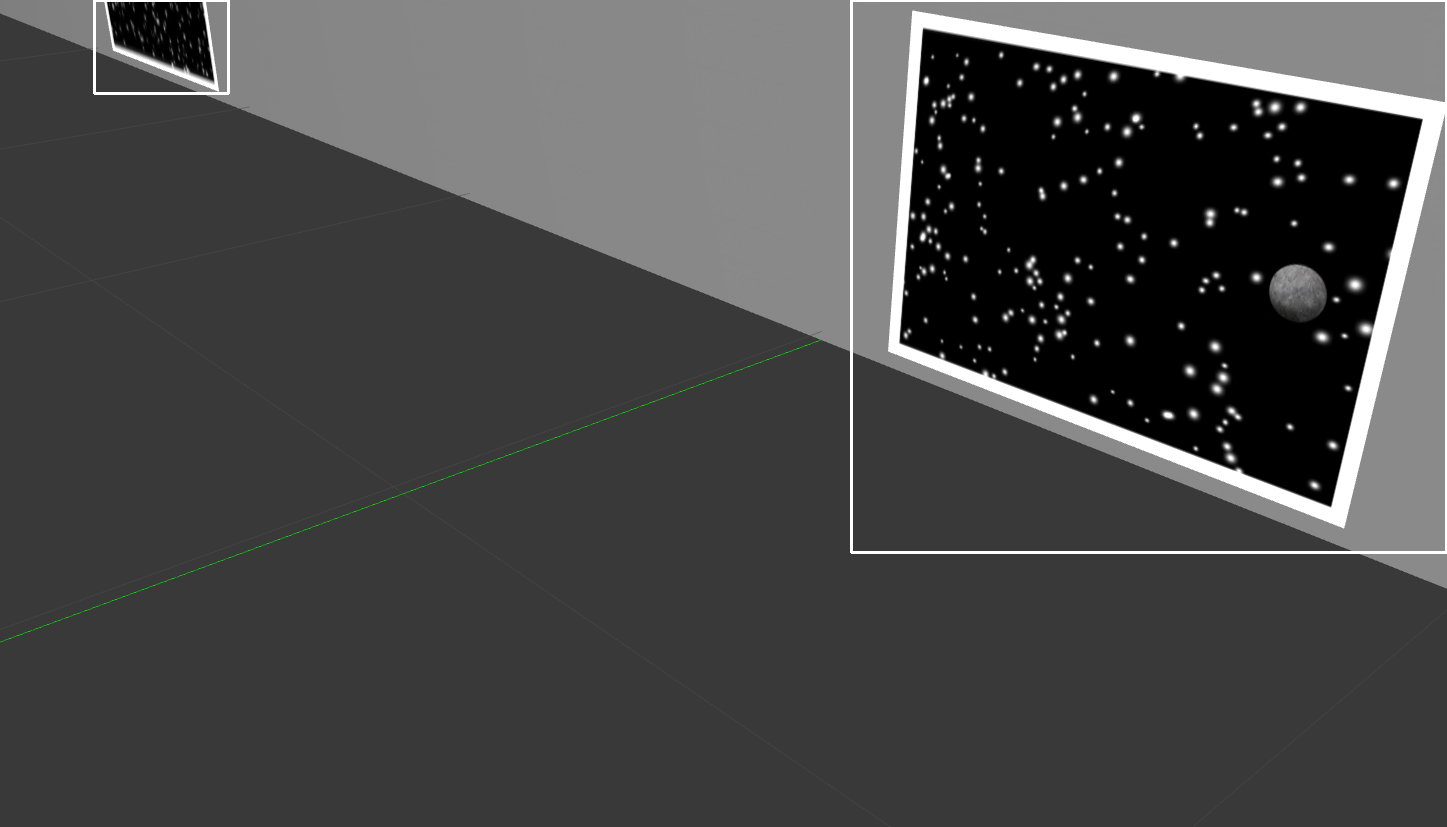

In [21]:
#
import cv2
import numpy as np
from PIL import Image
import os
import shutil
from google.colab.patches import cv2_imshow

image_path = '/content/drive/MyDrive/TestData3.png'
img = cv2.imread(image_path)
height, width, _ = img.shape
print(f"Image Size - Width: {width}, Height: {height}")

model = YOLO('/content/datasets/runs/detect/train2/weights/best.pt')
result = model.predict(image_path, imgsz = 960, conf = 0.5, iou = 0.5)
class_name = model.names

# get boxes on cpu in numpy
boxes = result[0].boxes.cpu().numpy()
print ("confidence score:", (boxes.conf))
labels = boxes.cls.astype(int).tolist()

print(labels)

original_image = cv2.imread(image_path)

# Draw bounding boxes on the original image
for box, label in zip(boxes, labels):
    # get corner points as int
    r = box.xyxy[0].astype(int)
    cv2.rectangle(original_image, tuple(r[:2]), tuple(r[2:]), (255, 255, 255), 2)

    # Add class label text
    cv2.putText(original_image, f"Class: {class_name[label]}", (r[0], r[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)

# Display the modified image with bounding boxes
cv2_imshow(original_image)